## 问题1数学建模过程及统计性分析

### 1. 问题描述

研究16个加工原料两两之间的亲缘值，并进行统计性分析。

### 2. 数学模型

#### 变量定义：

- **$g_i$**: 第 $i$ 个原料的基因序列，其中 $i \in \{1, 2, \ldots, 16\}$。
- **$a_{ij}$**: 原料 $i$ 和原料 $j$ 之间的亲缘值。

#### 亲缘值的计算：

亲缘值 **$a_{ij}$** 定义为原料 $i$ 和原料 $j$ 基因序列中相同位点的数量。用数学表达式表示为：

$$
a_{ij} = \sum_{k=1}^{10} \delta(g_i^k, g_j^k)
$$

其中，**$g_i^k$** 表示原料 $i$ 的第 $k$ 个基因位点，**$\delta(g_i^k, g_j^k)$** 为指示函数：

$$
\delta(g_i^k, g_j^k) = \begin{cases} 
1, & \text{if } g_i^k = g_j^k \\
0, & \text{if } g_i^k \ne g_j^k 
\end{cases}
$$

具体计算步骤如下：

1. **定义变量**：假设有16个原料，每个原料的基因序列为 $g_i$。
2. **亲缘值计算**：对每一对原料 $(i, j)$，计算它们基因序列中相同位点的数量 $a_{ij}$。

例如，假设原料1和原料2的基因序列分别为 $g_1 = [a, b, c, d, e, f, g, h, i, j]$ 和 $g_2 = [a, b, c, d, e, o, p, k, l, m]$，则亲缘值 $a_{12}$ 计算为：

$$
a_{12} = \sum_{k=1}^{10} \delta(g_1^k, g_2^k) = 5
$$

#### 亲缘值矩阵

将所有原料两两之间的亲缘值计算出来，构成亲缘值矩阵 **$A$**：

$$
A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix}
$$

其中 $n = 16$，矩阵 **$A$** 是对称的，即 $a_{ij} = a_{ji}$。

#### 亲缘值矩阵计算步骤：

1. **初始化矩阵**：创建一个 $16 \times 16$ 的零矩阵 **$A$**。
2. **计算矩阵元素**：对于每一对原料 $(i, j)$，计算它们之间的亲缘值，并填入矩阵的对应位置：

$$
A[i, j] = a_{ij}, \quad A[j, i] = a_{ij}
$$

### 3. 统计性分析

对亲缘值矩阵进行统计性分析，计算每个原料的亲缘值均值、标准差、最小值、最大值、中位数等统计量。

#### 统计量的计算公式：

- **均值**（Mean）：

$$
\bar{a} = \frac{1}{n} \sum_{i=1}^{n} a_{i}
$$

- **标准差**（Standard Deviation）：

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (a_{i} - \bar{a})^2}
$$

- **最小值**（Min）：所有亲缘值中的最小值。
- **最大值**（Max）：所有亲缘值中的最大值。
- **中位数**（Median）：所有亲缘值的中位数。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph.*")

# 原料基因数据
genes = [
    ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
    ['a', 'b', 'c', 'd', 'e', 'o', 'p', 'k', 'l', 'm'],
    ['f', 'g', 'h', 'a', 'j', 'o', 'p', 'k', 'l', 'm'],
    ['f', 'g', 'h', 'i', 'j', 'l', 'p', 'f', 'o', 'p'],
    ['f', 'b', 'h', 'd', 'e', 'o', 'p', 'a', 'o', 'z'],
    ['r', 'm', 't', 'u', 'q', 'f', 'g', 'a', 'f', 'z'],
    ['r', 's', 't', 'u', 'k', 'f', 'g', 'h', 'f', 'c'],
    ['r', 's', 't', 'u', 'a', 'b', 'h', 'i', 'j', 'c'],
    ['c', 's', 'a', 'f', 'v', 'w', 'a', 'i', 'j', 'c'],
    ['b', 'm', 'n', 'i', 'a', 'z', 'h', 'f', 'o', 'z'],
    ['m', 'a', 'm', 'e', 'a', 'z', 'a', 'b', 'a', 'b'],
    ['m', 'c', 'm', 'e', 'x', 'h', 'a', 'b', 'n', 'a'],
    ['b', 'a', 'n', 'y', 'c', 'g', 'm', 'b', 'm', 'b'],
    ['m', 'c', 'm', 'y', 'x', 'g', 'm', 'b', 'n', 'b'],
    ['b', 'x', 'n', 'i', 'c', 'l', 'b', 'c', 'm', 'p'],
    ['c', 'c', 'a', 'f', 'x', 'h', 'b', 'c', 'm', 'j']
]



In [2]:
# 计算亲缘值
def calculate_affinity(genome1, genome2):
    return sum(g1 == g2 for g1, g2 in zip(genome1, genome2))


In [3]:
# 创建亲缘值矩阵
affinity_matrix = np.zeros((16, 16))

for i in range(16):
    for j in range(i + 1, 16):
        affinity_matrix[i, j] = calculate_affinity(genes[i], genes[j])
        affinity_matrix[j, i] = affinity_matrix[i, j]

In [4]:
# 将亲缘值矩阵转换为DataFrame
affinity_df = pd.DataFrame(affinity_matrix, columns=[f"原料{i+1}" for i in range(16)], index=[f"原料{i+1}" for i in range(16)])

# 统计分析
affinity_stats = affinity_df.describe()

# 保存结果
affinity_df.to_csv('亲缘值矩阵.csv')
affinity_stats.to_csv('亲缘值统计分析.csv')

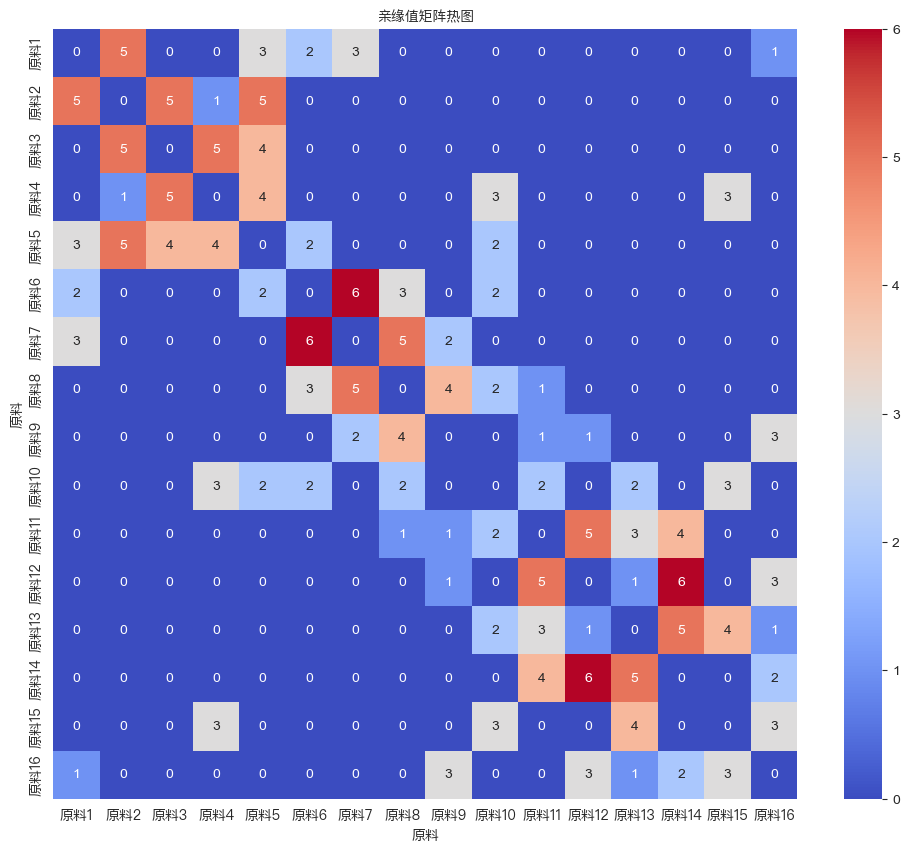

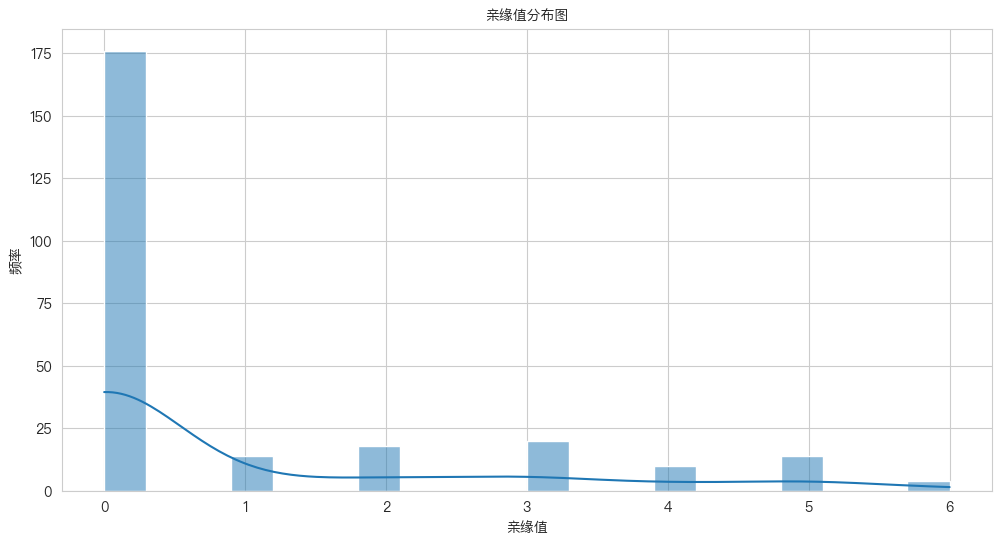

In [5]:
from matplotlib.font_manager import FontProperties

font_path = '/System/Library/Fonts/PingFang.ttc'
my_font = FontProperties(fname=font_path)

plt.figure(figsize=(12, 10))
sns.heatmap(affinity_df, annot=True, cmap='coolwarm', cbar=True)
plt.title('亲缘值矩阵热图', fontproperties=my_font)
plt.xlabel('原料', fontproperties=my_font)
plt.ylabel('原料', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(affinity_df.values.flatten(), bins=20, kde=True)
plt.title('亲缘值分布图', fontproperties=my_font)
plt.xlabel('亲缘值', fontproperties=my_font)
plt.ylabel('频率', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()